<a href="https://colab.research.google.com/github/Adamac123/PwC_data_talent_lab/blob/main/PwC_acceleration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

# Wgrywanie i czyszczenie danych

In [97]:
df = pd.read_csv('acceleration_data.csv', skipinitialspace=True,sep=',""', engine ='python',doublequote=False)
df.head(3)

,"""ID","GEO""""","SECTOR""""","EMPLOYEES""""","INCOME""""","MARKETING_SPENDING""""","ACC_BEFORE""""","PWC_PRESS_INDEX""""","FB_LIKES""""","TWT_FOLLOWERS""""","YEAR_FOUNDED""""","EXP_CEO""""","AREA""""","PWC_EMPLOYEES""""","CREDIT""""","FLAG"""""""
0,"""1","21.0017163707095,52.2314057981037""""","PUB""""","2""""","150426""""","7964""""","0""""","-8.07833534412621""""","1633""""","138""""","2010""""","NA""""","32""""","0""""","19950""""","0"""""""
1,"""2","21.0068688148316 , 52.2332658119407 """"","PUB""""","6""""","500078""""","30212""""","0""""","17.0328512444591""""","6128""""","605""""","2011""""","NA""""","44""""","1""""","45104""""","1"""""""
2,"""3","21.0746074383869 , 52.2790054865787 """"","IT""""","27""""","199767""""","4970""""","0""""","-7.32162072546331""""","487""""","106""""","2005""""","NA""""","83""""","0""""","499""""","0"""""""


In [4]:
df = pd.read_csv('acceleration_data.csv', skipinitialspace=True,sep=',""', engine ='python',doublequote=False).replace('"','',regex=True)
df.head(3)


,"""ID","GEO""""","SECTOR""""","EMPLOYEES""""","INCOME""""","MARKETING_SPENDING""""","ACC_BEFORE""""","PWC_PRESS_INDEX""""","FB_LIKES""""","TWT_FOLLOWERS""""","YEAR_FOUNDED""""","EXP_CEO""""","AREA""""","PWC_EMPLOYEES""""","CREDIT""""","FLAG"""""""
0,1,"21.0017163707095,52.2314057981037",PUB,2,150426,7964,0,-8.07833534412621,1633,138,2010,NA,32,0,19950,0
1,2,"21.0068688148316 , 52.2332658119407",PUB,6,500078,30212,0,17.0328512444591,6128,605,2011,NA,44,1,45104,1
2,3,"21.0746074383869 , 52.2790054865787",IT,27,199767,4970,0,-7.32162072546331,487,106,2005,NA,83,0,499,0


In [5]:
df_czysty = df.rename(columns={'"ID':'ID', 'GEO""':'GEO', 'SECTOR""':'SECTOR','EMPLOYEES""':'EMPLOYEES','INCOME""':'INCOME','MARKETING_SPENDING""':'MARKETING_SPENDING','ACC_BEFORE""':'ACC_BEFORE','PWC_PRESS_INDEX""':'PWC_PRESS_INDEX','FB_LIKES""':'FB_LIKES','TWT_FOLLOWERS""':'TWT_FOLLOWERS','YEAR_FOUNDED""':'YEAR_FOUNDED','EXP_CEO""':'EXP_CEO','AREA""':'AREA','PWC_EMPLOYEES""':'PWC_EMPLOYEES','CREDIT""':'CREDIT','FLAG"""':'FLAG'})
df_czysty.head(3)

,ID,GEO,SECTOR,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,YEAR_FOUNDED,EXP_CEO,AREA,PWC_EMPLOYEES,CREDIT,FLAG
0,1,"21.0017163707095,52.2314057981037",PUB,2,150426,7964,0,-8.07833534412621,1633,138,2010,NA,32,0,19950,0
1,2,"21.0068688148316 , 52.2332658119407",PUB,6,500078,30212,0,17.0328512444591,6128,605,2011,NA,44,1,45104,1
2,3,"21.0746074383869 , 52.2790054865787",IT,27,199767,4970,0,-7.32162072546331,487,106,2005,NA,83,0,499,0


In [98]:
df_czysty.columns

Index(['ID', 'GEO', 'SECTOR', 'EMPLOYEES', 'INCOME', 'MARKETING_SPENDING',
       'ACC_BEFORE', 'PWC_PRESS_INDEX', 'FB_LIKES', 'TWT_FOLLOWERS',
       'YEAR_FOUNDED', 'EXP_CEO', 'AREA', 'PWC_EMPLOYEES', 'CREDIT', 'FLAG'],
      dtype='object')

In [99]:
df_czysty_typydanych = df_czysty.astype({'ID':int, 'GEO':object, 'SECTOR':str, 'EMPLOYEES':int, 'INCOME':float, 'MARKETING_SPENDING':float,
       'ACC_BEFORE':int, 'PWC_PRESS_INDEX':float, 'FB_LIKES':int, 'TWT_FOLLOWERS':int,
       'YEAR_FOUNDED':object, 'EXP_CEO':object, 'AREA':float, 'PWC_EMPLOYEES':int, 'CREDIT':float, 'FLAG':int})

In [100]:
df_czysty_typydanych.dtypes

ID                      int64
GEO                    object
SECTOR                 object
EMPLOYEES               int64
INCOME                float64
MARKETING_SPENDING    float64
ACC_BEFORE              int64
PWC_PRESS_INDEX       float64
FB_LIKES                int64
TWT_FOLLOWERS           int64
YEAR_FOUNDED           object
EXP_CEO                object
AREA                  float64
PWC_EMPLOYEES           int64
CREDIT                float64
FLAG                    int64
dtype: object

# Geospacial data

rozdzielamy kolumnę zawierającą długość i szerokość geograficzną na dwie

In [9]:
lat = []
lon = []

for row in df_czysty_typydanych['GEO']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)


# Create two new columns from lat and lon
df_czysty_typydanych['latitude'] = lat
df_czysty_typydanych['longitude'] = lon
df_czysty_typydanych.drop('GEO', axis = 1)

,ID,SECTOR,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,YEAR_FOUNDED,EXP_CEO,AREA,PWC_EMPLOYEES,CREDIT,FLAG,latitude,longitude
0,1,PUB,2,150426.0,7964.0,0,-8.078335,1633,138,2010,NA,32.0,0,19950.0,0,21.0017163707095,52.2314057981037
1,2,PUB,6,500078.0,30212.0,0,17.032851,6128,605,2011,NA,44.0,1,45104.0,1,21.0068688148316,52.2332658119407
2,3,IT,27,199767.0,4970.0,0,-7.321621,487,106,2005,NA,83.0,0,499.0,0,21.0746074383869,52.2790054865787
3,4,IT,5,109200.0,7010.0,1,1.135431,661,116,2011,NA,21.0,1,0.0,1,21.0120824468674,52.2320822895085
4,5,IT,3,112200.0,9000.0,0,0.950873,926,172,2012,5,23.0,0,-997.0,1,21.0001250609641,52.2399573325692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,IT,8,79900.0,8980.0,0,0.974774,888,180,2012,NA,18.0,2,2004.0,1,21.0245139057341,52.2359749760199
9996,9997,IT,19,336500.0,23940.0,0,4.389039,2383,496,2006,NA,202.0,5,0.0,1,21.0186472133435,52.2313234646758
9997,9998,IT,3,200265.0,4981.0,1,-4.523559,502,109,2002,5,74.0,1,499.0,0,21.0660097305197,52.2955965697952
9998,9999,IT,30,199951.0,4957.0,1,-3.898251,532,101,2001,6,76.0,0,1000.0,1,21.0846834506607,52.2756593818404


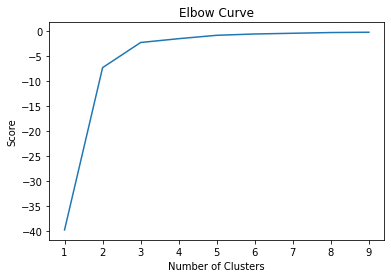

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_czysty_typydanych[['latitude']]
X_axis = df_czysty_typydanych[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Wniosek - że podzielimy dane na 3 clusters

In [11]:
km = KMeans(n_clusters = 3, random_state=45)

In [12]:
y_predicted = km.fit_predict(df_czysty_typydanych[['latitude', 'longitude']])
y_predicted.shape

(10000,)

In [13]:
df_czysty_typydanych['cluster_label'] = y_predicted
df_czysty_typydanych.head(2)

,ID,GEO,SECTOR,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,YEAR_FOUNDED,EXP_CEO,AREA,PWC_EMPLOYEES,CREDIT,FLAG,latitude,longitude,cluster_label
0,1,"21.0017163707095,52.2314057981037",PUB,2,150426.0,7964.0,0,-8.078335,1633,138,2010,NA,32.0,0,19950.0,0,21.0017163707095,52.2314057981037,2
1,2,"21.0068688148316 , 52.2332658119407",PUB,6,500078.0,30212.0,0,17.032851,6128,605,2011,NA,44.0,1,45104.0,1,21.0068688148316,52.2332658119407,2


# Exploratory data analysis


Sprawdzam ile firm z bazy danych upadło a ile nie.
Wygląda to na w dobrze zbalasnowaną bazę danych 

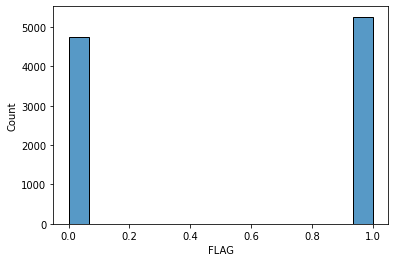

In [14]:
df_clean = df_czysty_typydanych
sns.histplot(df_clean['FLAG'])


Robię pierwsze korelacje i wizualizacje

In [15]:
df_clean.columns

Index(['ID', 'GEO', 'SECTOR', 'EMPLOYEES', 'INCOME', 'MARKETING_SPENDING',
       'ACC_BEFORE', 'PWC_PRESS_INDEX', 'FB_LIKES', 'TWT_FOLLOWERS',
       'YEAR_FOUNDED', 'EXP_CEO', 'AREA', 'PWC_EMPLOYEES', 'CREDIT', 'FLAG',
       'latitude', 'longitude', 'cluster_label'],
      dtype='object')

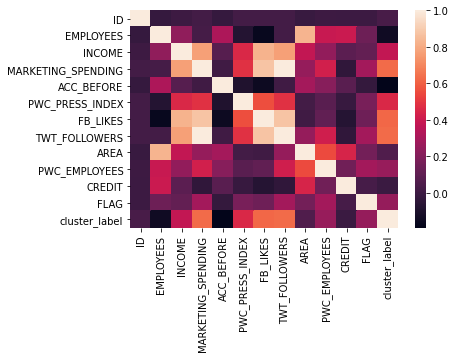

In [16]:
sns.heatmap(df_clean.corr())

Dzielę bazę danych na dwie. Te firmy, które upadły w ciągu dwóch lat i te które nie upadły.


In [17]:
grupowanie = df_clean.groupby(df_czysty.FLAG)
df_upadli = grupowanie.get_group('1')
df_nieupadli = grupowanie.get_group('0')


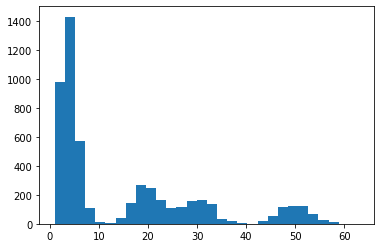

In [18]:

plt.hist(df_upadli['EMPLOYEES'], bins = 30)
plt.show()

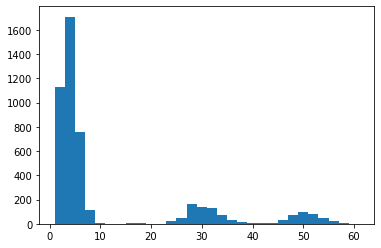

In [19]:

plt.hist(df_nieupadli['EMPLOYEES'], bins = 30)
plt.show()

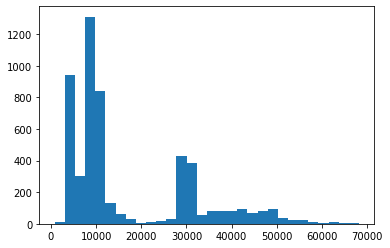

In [20]:
plt.hist(df_upadli['MARKETING_SPENDING'], bins = 30)
plt.show()

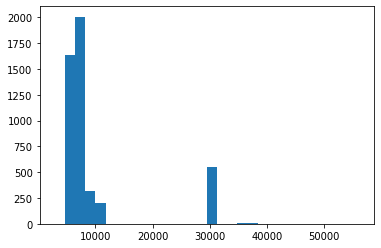

In [21]:
plt.hist(df_nieupadli['MARKETING_SPENDING'], bins = 30)
plt.show()

In [22]:
grupowanie_sektor = df_clean.groupby(df_czysty_typydanych.SECTOR)
df_IT = grupowanie_sektor.get_group('IT')
df_RESTAURANT = grupowanie_sektor.get_group('RESTAURANT')
df_PUB = grupowanie_sektor.get_group('PUB')


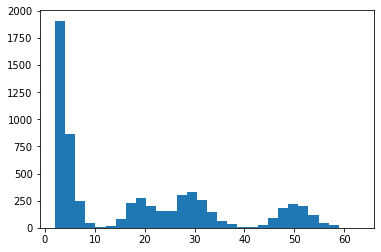

In [23]:
plt.hist(df_IT["EMPLOYEES"], bins = 30)
plt.show()

In [24]:
df_IT.loc[df_IT['FLAG']==1].describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3.865000e+03,3865.0,3865.000000
mean,5006.973868,18.973351,223115.526779,16321.079690,0.407245,0.042918,1634.346184,326.759897,129.365847,2.554204,4.243235e+05,1.0,1.281242
std,2904.194017,15.803941,134576.682417,14981.276234,0.491385,3.261681,1497.552626,300.706944,111.148047,2.222654,1.994190e+06,0.0,0.808100
min,4.000000,2.000000,17300.000000,830.000000,0.000000,-8.414041,91.000000,16.000000,11.000000,0.000000,-8.998000e+03,1.0,0.000000
25%,2477.000000,5.000000,91100.000000,5950.000000,0.000000,-2.799041,581.000000,119.000000,29.000000,1.000000,0.000000e+00,1.0,1.000000
50%,4982.000000,18.000000,199995.000000,9917.000000,0.000000,1.307933,972.000000,192.000000,73.000000,2.000000,1.007000e+03,1.0,2.000000
75%,7540.000000,29.000000,338500.000000,21970.000000,1.000000,2.606159,2227.000000,450.000000,202.000000,4.000000,2.031000e+04,1.0,2.000000
max,10000.000000,63.000000,600750.000000,68180.000000,1.000000,5.945333,6893.000000,1410.000000,385.000000,15.000000,1.313101e+07,1.0,2.000000


In [25]:
df_IT.loc[df_IT['FLAG']==0].describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.000000
mean,4932.467147,18.047054,200875.054684,6504.406952,0.601102,-3.484925,646.554472,130.038152,115.713862,1.397626,4.483392e+05,0.0,0.326833
std,2885.113673,18.127643,68791.743325,3534.667725,0.489775,2.621050,355.822596,71.550473,103.727116,1.482586,2.059812e+06,0.0,0.498944
min,3.000000,2.000000,-900.000000,2910.000000,0.000000,-8.272223,285.000000,61.000000,16.000000,0.000000,-6.999000e+03,0.0,0.000000
25%,2453.500000,3.000000,199544.500000,4969.500000,0.000000,-5.299301,486.000000,96.000000,67.000000,0.000000,5.575000e+02,0.0,0.000000
50%,4885.000000,5.000000,199991.000000,5038.000000,1.000000,-4.364587,508.000000,106.000000,71.000000,1.000000,9.480000e+02,0.0,0.000000
75%,7383.500000,31.000000,200532.000000,7895.500000,1.000000,-2.193564,780.500000,156.000000,76.000000,2.000000,1.317500e+03,0.0,1.000000
max,9998.000000,61.000000,647000.000000,56080.000000,1.000000,5.643814,5581.000000,1109.000000,387.000000,9.000000,1.212151e+07,0.0,2.000000


In [26]:
df_RESTAURANT.loc[df_RESTAURANT['FLAG']==1].describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,444.000000
mean,5148.860360,3.810811,310147.894144,18101.459459,0.101351,2.016113,3624.736486,361.765766,38.957207,0.477477,26339.855856,1.0,1.195946
std,2842.634489,1.625216,176986.429121,10978.492531,0.302134,13.325889,2201.959589,221.348839,10.513475,0.712315,18507.184676,0.0,0.978266
min,55.000000,1.000000,59500.000000,7725.000000,0.000000,-35.723762,1440.000000,118.000000,22.000000,0.000000,0.000000,1.0,0.000000
25%,2735.000000,2.750000,149790.500000,7989.000000,0.000000,-7.692456,1593.750000,157.000000,30.000000,0.000000,16569.750000,1.0,0.000000
50%,5180.500000,4.000000,200300.000000,8125.500000,0.000000,1.766532,1665.500000,177.000000,34.000000,0.000000,23167.000000,1.0,2.000000
75%,7579.750000,5.000000,499996.500000,29986.000000,0.000000,11.215746,5998.250000,598.250000,49.000000,1.000000,40005.500000,1.0,2.000000
max,9985.000000,9.000000,502523.000000,30532.000000,1.000000,59.938575,6262.000000,652.000000,64.000000,4.000000,90213.000000,1.0,2.000000


In [27]:
df_RESTAURANT.loc[df_RESTAURANT['FLAG']==0].describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.0,816.000000
mean,5135.560049,3.479167,229273.752451,12982.665441,0.099265,-1.203459,2595.734069,259.838235,34.473039,0.480392,17005.436275,0.0,1.327206
std,2867.260389,1.568730,147401.462109,9211.341920,0.299200,12.355366,1840.137842,184.412423,9.181697,0.682549,17300.918070,0.0,0.714131
min,17.000000,1.000000,48800.000000,7719.000000,0.000000,-34.129506,1462.000000,114.000000,21.000000,0.000000,0.000000,0.0,0.000000
25%,2671.000000,2.000000,149765.000000,7957.500000,0.000000,-9.896535,1582.000000,154.750000,28.000000,0.000000,0.000000,0.0,1.000000
50%,5177.000000,3.000000,150161.500000,8032.500000,0.000000,-2.044560,1616.000000,166.000000,31.000000,0.000000,16985.000000,0.0,1.000000
75%,7716.000000,5.000000,190125.000000,8171.750000,0.000000,7.051086,1681.000000,185.000000,36.000000,1.000000,24966.250000,0.0,2.000000
max,9988.000000,8.000000,501751.000000,30422.000000,1.000000,40.309207,6291.000000,671.000000,63.000000,3.000000,90262.000000,0.0,2.000000


In [28]:
df_PUB.loc[df_PUB['FLAG']==1].describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.000000
mean,4802.567677,3.977778,311070.240404,18129.527273,0.092929,2.215916,3628.523232,362.311111,38.997980,0.533333,24761.569697,1.0,1.224242
std,2851.727091,1.607646,176256.357740,10980.424923,0.290627,12.998429,2193.661765,220.419990,10.712001,0.729927,19480.078569,0.0,0.973442
min,2.000000,1.000000,69200.000000,7676.000000,0.000000,-33.792568,1448.000000,124.000000,22.000000,0.000000,-148.000000,1.0,0.000000
25%,2467.500000,3.000000,149803.500000,7990.000000,0.000000,-7.297671,1598.500000,158.000000,30.000000,0.000000,12052.500000,1.0,0.000000
50%,4625.000000,4.000000,200100.000000,8127.000000,0.000000,2.071012,1678.000000,180.000000,35.000000,0.000000,21104.000000,1.0,2.000000
75%,7209.000000,5.000000,499960.000000,30001.500000,0.000000,11.655176,5987.000000,596.000000,49.000000,1.000000,35130.000000,1.0,2.000000
max,9980.000000,8.000000,501948.000000,30447.000000,1.000000,38.735470,6248.000000,653.000000,63.000000,4.000000,100249.000000,1.0,2.000000


In [29]:
df_PUB.loc[df_PUB['FLAG']==0].describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.000000
mean,4979.455729,3.432292,229069.397135,12949.100260,0.100260,-0.625267,2590.157552,258.864583,34.802083,0.529948,17436.523438,0.0,1.321615
std,2873.912733,1.585659,147065.560804,9190.845423,0.300543,12.603895,1840.264764,183.832997,9.484078,0.723341,17596.051144,0.0,0.716322
min,1.000000,1.000000,69900.000000,7659.000000,0.000000,-35.800223,1467.000000,124.000000,23.000000,0.000000,0.000000,0.0,0.000000
25%,2385.500000,2.000000,149825.750000,7959.000000,0.000000,-9.012018,1578.000000,154.000000,28.000000,0.000000,0.000000,0.0,1.000000
50%,5162.000000,3.000000,150196.000000,8030.000000,0.000000,-1.302003,1615.000000,165.000000,31.000000,0.000000,17960.000000,0.0,1.000000
75%,7294.250000,4.000000,190325.000000,8157.250000,0.000000,7.445811,1677.500000,184.000000,37.000000,1.000000,24961.000000,0.0,2.000000
max,9993.000000,9.000000,501745.000000,30409.000000,1.000000,33.960305,6197.000000,657.000000,62.000000,4.000000,95260.000000,0.0,2.000000


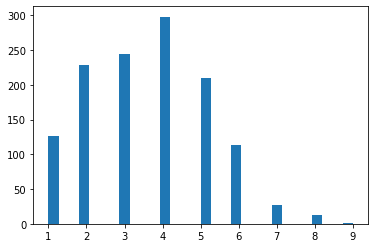

In [30]:
plt.hist(df_RESTAURANT["EMPLOYEES"], bins = 30)
plt.show()

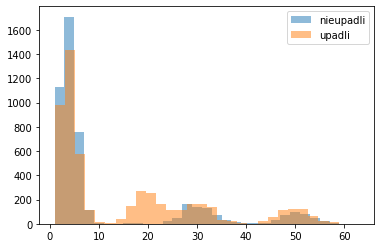

In [31]:
from matplotlib import pyplot
#bins = np.linspace(-10, 10, 100)
pyplot.hist(df_nieupadli['EMPLOYEES'],bins=30, alpha=0.5, label='nieupadli')
pyplot.hist(df_upadli['EMPLOYEES'],bins=30, alpha=0.5, label='upadli')
pyplot.legend(loc='upper right')
pyplot.show()

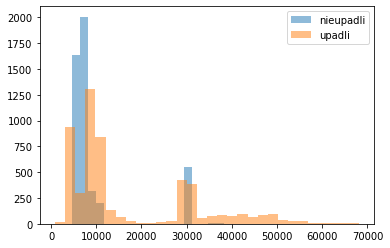

In [32]:
from matplotlib import pyplot
#bins = np.linspace(-10, 10, 100)
pyplot.hist(df_nieupadli['MARKETING_SPENDING'],bins=30, alpha=0.5, label='nieupadli')
pyplot.hist(df_upadli['MARKETING_SPENDING'],bins=30, alpha=0.5, label='upadli')
pyplot.legend(loc='upper right')
pyplot.show()

In [33]:
df_upadli.shape

(5261, 19)

In [34]:

df_nieupadli.shape

(4739, 19)

In [35]:
df_upadli.describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,5261.000000,5261.00000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5261.000000,5.261000e+03,5261.0,5261.000000
mean,4995.868086,14.97453,247156.495913,16851.800418,0.323893,0.712394,2173.782931,337.284547,105.409428,2.009504,3.186022e+05,1.0,1.265349
std,2886.650366,15.11422,152273.836683,14058.789007,0.468004,7.467961,1932.618277,282.212765,103.410524,2.142612,1.718256e+06,0.0,0.855042
min,2.000000,1.00000,17300.000000,830.000000,0.000000,-38.793253,91.000000,16.000000,11.000000,0.000000,-9.830000e+03,1.0,0.000000
25%,2517.000000,4.00000,111200.000000,7794.000000,0.000000,-3.473297,776.000000,146.000000,30.000000,0.000000,0.000000e+00,1.0,0.000000
50%,4947.000000,6.00000,200011.000000,9887.000000,0.000000,1.386690,1197.000000,190.000000,66.000000,1.000000,2.005000e+03,1.0,2.000000
75%,7479.000000,23.00000,379500.000000,29913.000000,1.000000,3.012582,3610.000000,589.000000,191.000000,3.000000,3.011800e+04,1.0,2.000000
max,10000.000000,63.00000,600750.000000,68180.000000,1.000000,59.938575,6893.000000,1410.000000,385.000000,15.000000,1.313101e+07,1.0,2.000000


In [36]:
df_nieupadli.describe()

,ID,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,AREA,PWC_EMPLOYEES,CREDIT,FLAG,cluster_label
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4.739000e+03,4739.0,4739.000000
mean,5005.642119,10.715763,216109.607512,9811.358936,0.350285,-2.227887,1637.201097,196.309559,75.034184,0.939650,2.319640e+05,0.0,0.831821
std,2887.463900,14.767425,116751.374092,7765.668943,0.477109,8.997429,1664.119253,156.176159,83.898425,1.241496,1.469057e+06,0.0,0.793462
min,1.000000,1.000000,-900.000000,2910.000000,0.000000,-35.800223,285.000000,61.000000,16.000000,0.000000,-6.999000e+03,0.0,0.000000
25%,2481.000000,3.000000,149972.500000,5039.000000,0.000000,-5.801258,508.000000,106.000000,31.000000,0.000000,0.000000e+00,0.0,0.000000
50%,5068.000000,4.000000,199540.000000,7956.000000,0.000000,-4.014559,1504.000000,154.000000,57.000000,1.000000,1.104000e+03,0.0,1.000000
75%,7522.000000,6.000000,200516.500000,8142.000000,1.000000,1.204708,1619.000000,177.000000,71.000000,1.000000,2.004200e+04,0.0,1.000000
max,9998.000000,61.000000,647000.000000,56080.000000,1.000000,40.309207,6291.000000,1109.000000,387.000000,9.000000,1.212151e+07,0.0,2.000000


Sprwadzam brakujące dane

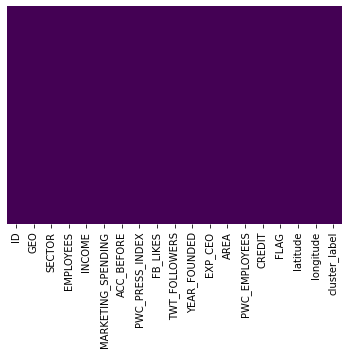

In [37]:
sns.heatmap(df_clean.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Nie ma braków  w danych

In [38]:
df_clean['SECTOR'].value_counts()

IT            6224
PUB           1263
RESTAURANT    1260
CAFE          1253
Name: SECTOR, dtype: int64

In [39]:
df_clean['EXP_CEO'].value_counts()

NA    4397
6      929
5      873
4      728
7      722
8      519
3      415
9      255
2      186
10     173
11     173
13     158
12     153
14     113
1       89
15      72
16      26
17      11
18       5
20       2
21       1
Name: EXP_CEO, dtype: int64

In [40]:
df_clean['EMPLOYEES'].value_counts().head()

4    1560
3    1443
2    1214
5    1173
6     650
Name: EMPLOYEES, dtype: int64

In [41]:
df_clean['ACC_BEFORE'].value_counts()

0    6636
1    3364
Name: ACC_BEFORE, dtype: int64

In [42]:
df_clean['YEAR_FOUNDED'].value_counts()

2012    937
2013    925
2011    807
2006    721
2008    691
2007    684
2010    670
2009    655
2005    640
2004    633
2003    529
2002    477
2001    422
2000    327
1999    252
2014    193
1998    168
1997    123
1996     58
1995     49
1994     18
1993     10
1992      6
1991      3
1990      1
1989      1
Name: YEAR_FOUNDED, dtype: int64

In [43]:
type(df_clean['EXP_CEO'])

pandas.core.series.Series

Sprawdzam różnice między grupami (ttest i wskaźnik siły efektu)

In [44]:
from scipy.stats import ttest_ind
from scipy.stats import levene
lev = levene(df_upadli['EMPLOYEES'],df_nieupadli['EMPLOYEES'])
ttes = ttest_ind(df_upadli['EMPLOYEES'],df_nieupadli['EMPLOYEES'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=115.95307114448607, pvalue=6.833194648325876e-27) a wynik testu t to  Ttest_indResult(statistic=14.240355181921714, pvalue=1.443419444263094e-45)


In [45]:
from statistics import mean, stdev
from math import sqrt

cohens_d = (mean(df_upadli['EMPLOYEES']) - mean(df_nieupadli['EMPLOYEES'])) / (sqrt((stdev(df_upadli['EMPLOYEES']) ** 2 + stdev(df_nieupadli['EMPLOYEES']) ** 2) / 2))

print(cohens_d)

0.2850231208069894


In [46]:

lev = levene(df_upadli['INCOME'],df_nieupadli['INCOME'])
ttes = ttest_ind(df_upadli['INCOME'],df_nieupadli['INCOME'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=758.848736005936, pvalue=4.4595742051353034e-161) a wynik testu t to  Ttest_indResult(statistic=11.503804654368476, pvalue=1.98273725107839e-30)


In [47]:
cohens_d = (mean(df_upadli['INCOME']) - mean(df_nieupadli['INCOME'])) / (sqrt((stdev(df_upadli['INCOME']) ** 2 + stdev(df_nieupadli['INCOME']) ** 2) / 2))

print(cohens_d)

0.22882410611334025


In [48]:
lev = levene(df_upadli['MARKETING_SPENDING'],df_nieupadli['MARKETING_SPENDING'])
ttes = ttest_ind(df_upadli['MARKETING_SPENDING'],df_nieupadli['MARKETING_SPENDING'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=892.4740697165877, pvalue=6.510019543503144e-188) a wynik testu t to  Ttest_indResult(statistic=31.393585307505955, pvalue=1.3153084046411964e-204)


In [49]:
cohens_d = (mean(df_upadli['MARKETING_SPENDING']) - mean(df_nieupadli['MARKETING_SPENDING'])) / (sqrt((stdev(df_upadli['MARKETING_SPENDING']) ** 2 + stdev(df_nieupadli['MARKETING_SPENDING']) ** 2) / 2))

print(cohens_d)

0.6199301791620687


In [50]:
lev = levene(df_upadli['PWC_PRESS_INDEX'],df_nieupadli['PWC_PRESS_INDEX'])
ttes = ttest_ind(df_upadli['PWC_PRESS_INDEX'],df_nieupadli['PWC_PRESS_INDEX'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=80.94300072198031, pvalue=2.7453683810156755e-19) a wynik testu t to  Ttest_indResult(statistic=17.671804092292547, pvalue=9.289212386085558e-69)


In [51]:
cohens_d = (mean(df_upadli['PWC_PRESS_INDEX']) - mean(df_nieupadli['PWC_PRESS_INDEX'])) / (sqrt((stdev(df_upadli['PWC_PRESS_INDEX']) ** 2 + stdev(df_nieupadli['PWC_PRESS_INDEX']) ** 2) / 2))

print(cohens_d)

0.3556159441398168


In [52]:
lev = levene(df_upadli['TWT_FOLLOWERS'],df_nieupadli['TWT_FOLLOWERS'])
ttes = ttest_ind(df_upadli['TWT_FOLLOWERS'],df_nieupadli['TWT_FOLLOWERS'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=832.7228465998088, pvalue=5.911868555000186e-176) a wynik testu t to  Ttest_indResult(statistic=31.300397104571037, pvalue=1.754763509865475e-203)


In [53]:
cohens_d = (mean(df_upadli['TWT_FOLLOWERS']) - mean(df_nieupadli['TWT_FOLLOWERS'])) / (sqrt((stdev(df_upadli['TWT_FOLLOWERS']) ** 2 + stdev(df_nieupadli['TWT_FOLLOWERS']) ** 2) / 2))

print(cohens_d)

0.6181121061200178


In [54]:
lev = levene(df_upadli['AREA'],df_nieupadli['AREA'])
ttes = ttest_ind(df_upadli['AREA'],df_nieupadli['AREA'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=353.160947068473, pvalue=1.8607634888317995e-77) a wynik testu t to  Ttest_indResult(statistic=16.194738102186392, pvalue=3.071742188750249e-58)


In [55]:
cohens_d = (mean(df_upadli['AREA']) - mean(df_nieupadli['AREA'])) / (sqrt((stdev(df_upadli['AREA']) ** 2 + stdev(df_nieupadli['AREA']) ** 2) / 2))

print(cohens_d)

0.32258751132605606


In [56]:
lev = levene(df_upadli['FB_LIKES'],df_nieupadli['FB_LIKES'])
ttes = ttest_ind(df_upadli['FB_LIKES'],df_nieupadli['FB_LIKES'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=185.88019729538047, pvalue=5.973946349792309e-42) a wynik testu t to  Ttest_indResult(statistic=14.914802186204657, pvalue=9.058746358104706e-50)


In [57]:
cohens_d = (mean(df_upadli['FB_LIKES']) - mean(df_nieupadli['FB_LIKES'])) / (sqrt((stdev(df_upadli['FB_LIKES']) ** 2 + stdev(df_nieupadli['FB_LIKES']) ** 2) / 2))

print(cohens_d)

0.2975435025263735


In [58]:
lev = levene(df_upadli['PWC_EMPLOYEES'],df_nieupadli['PWC_EMPLOYEES'])
ttes = ttest_ind(df_upadli['PWC_EMPLOYEES'],df_nieupadli['PWC_EMPLOYEES'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=633.9679387399027, pvalue=1.0905226910957373e-135) a wynik testu t to  Ttest_indResult(statistic=30.911774851630444, pvalue=4.957316297746933e-199)


In [59]:
cohens_d = (mean(df_upadli['PWC_EMPLOYEES']) - mean(df_nieupadli['PWC_EMPLOYEES'])) / (sqrt((stdev(df_upadli['PWC_EMPLOYEES']) ** 2 + stdev(df_nieupadli['PWC_EMPLOYEES']) ** 2) / 2))

print(cohens_d)


0.6109913762679716


In [60]:
lev = levene(df_upadli['CREDIT'],df_nieupadli['CREDIT'])
ttes = ttest_ind(df_upadli['CREDIT'],df_nieupadli['CREDIT'], equal_var = False)
print("wynik testu levena to",lev, "a wynik testu t to ", ttes)

wynik testu levena to LeveneResult(statistic=7.30897667214601, pvalue=0.0068726995050187424) a wynik testu t to  Ttest_indResult(statistic=2.7173023240316607, pvalue=0.006593009619936354)


In [61]:
cohens_d = (mean(df_upadli['CREDIT']) - mean(df_nieupadli['CREDIT'])) / (sqrt((stdev(df_upadli['CREDIT']) ** 2 + stdev(df_nieupadli['CREDIT']) ** 2) / 2))

print(cohens_d)


0.05419903806220481


WIZUALIZACJA zmiennych, które najbardziej różniły się w grupach upadli i nie_upadli (tych zmiennych które później zostały użyte do budowy modelu)

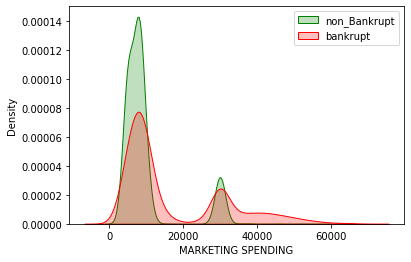

In [62]:
sns.kdeplot(df_clean.MARKETING_SPENDING[df_clean.FLAG==0], label='nieupadli', shade=True, color = 'green')
sns.kdeplot(df_clean.MARKETING_SPENDING[df_clean.FLAG==1], label='upadli', shade=True, color = 'red')
plt.legend(labels=['non_Bankrupt', 'bankrupt'])
plt.xlabel('MARKETING SPENDING');

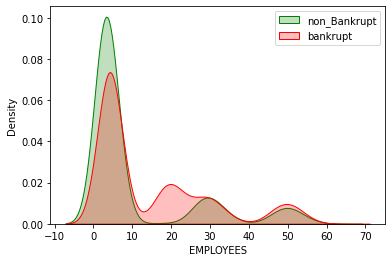

In [63]:
sns.kdeplot(df_clean.EMPLOYEES[df_clean.FLAG==0], label='nieupadli', shade=True, color = 'green')
sns.kdeplot(df_clean.EMPLOYEES[df_clean.FLAG==1], label='upadli', shade=True, color = 'red')
plt.legend(labels=['non_Bankrupt', 'bankrupt'])
plt.xlabel('EMPLOYEES');

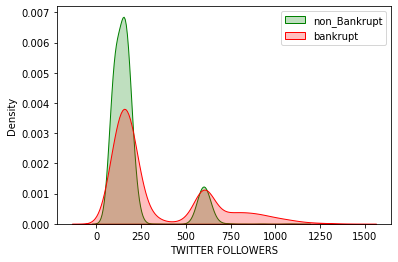

In [64]:
sns.kdeplot(df_clean.TWT_FOLLOWERS[df_clean.FLAG==0], label='nieupadli', shade=True, color = 'green')
sns.kdeplot(df_clean.TWT_FOLLOWERS[df_clean.FLAG==1], label='upadli',  shade=True, color = 'red')
plt.legend(labels=['non_Bankrupt', 'bankrupt'])
plt.xlabel('TWITTER FOLLOWERS');

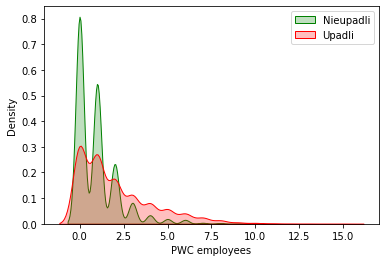

In [65]:
sns.kdeplot(df_clean.PWC_EMPLOYEES[df_clean.FLAG==0], label='nieupadli', shade=True, color = 'green')
sns.kdeplot(df_clean.PWC_EMPLOYEES[df_clean.FLAG==1], label='upadli',  shade=True, color = 'red')
plt.legend(labels=['Nieupadli', 'Upadli'])
plt.xlabel('PWC employees');

# Przygotowywanie danych do Machine learning model

Pamiętaj o cleaning data (nie wiem czy zrobiłes to dostatecznie dobrze) , oraz categorical variables (zamieniamy je na tzw. dummy variables)


In [66]:
df_clean['EXP_CEO'].replace(to_replace='NA', value = 7, inplace =True) # 7 to wartość oczekiwana
df_clean['EXP_CEO'].tail(5)

9995     7
9996     7
9997     5
9998     6
9999    13
Name: EXP_CEO, dtype: object

In [67]:
nowakolumna = df_clean['YEAR_FOUNDED'].astype(int).subtract(2014)
YEAR_FOUNDED_ABSOLUTE=np.absolute(nowakolumna)
YEAR_FOUNDED_ABSOLUTE


0        4
1        3
2        9
3        3
4        2
        ..
9995     2
9996     8
9997    12
9998    13
9999    15
Name: YEAR_FOUNDED, Length: 10000, dtype: int64

In [68]:
 SECTOR_dummy = pd.get_dummies(df_clean['SECTOR'], drop_first=True)
 SECTOR_dummy

,IT,PUB,RESTAURANT
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,1,0,0


In [69]:
df_clean = pd.concat([df_clean, SECTOR_dummy, YEAR_FOUNDED_ABSOLUTE], axis = 1)
df_clean.head()

,ID,GEO,SECTOR,EMPLOYEES,INCOME,MARKETING_SPENDING,ACC_BEFORE,PWC_PRESS_INDEX,FB_LIKES,TWT_FOLLOWERS,YEAR_FOUNDED,EXP_CEO,AREA,PWC_EMPLOYEES,CREDIT,FLAG,latitude,longitude,cluster_label,IT,PUB,RESTAURANT,YEAR_FOUNDED
0,1,"21.0017163707095,52.2314057981037",PUB,2,150426.0,7964.0,0,-8.078335,1633,138,2010,7,32.0,0,19950.0,0,21.0017163707095,52.2314057981037,2,0,1,0,4
1,2,"21.0068688148316 , 52.2332658119407",PUB,6,500078.0,30212.0,0,17.032851,6128,605,2011,7,44.0,1,45104.0,1,21.0068688148316,52.2332658119407,2,0,1,0,3
2,3,"21.0746074383869 , 52.2790054865787",IT,27,199767.0,4970.0,0,-7.321621,487,106,2005,7,83.0,0,499.0,0,21.0746074383869,52.2790054865787,0,1,0,0,9
3,4,"21.0120824468674 , 52.2320822895085",IT,5,109200.0,7010.0,1,1.135431,661,116,2011,7,21.0,1,0.0,1,21.0120824468674,52.2320822895085,2,1,0,0,3
4,5,"21.0001250609641 , 52.2399573325692",IT,3,112200.0,9000.0,0,0.950873,926,172,2012,5,23.0,0,-997.0,1,21.0001250609641,52.2399573325692,2,1,0,0,2


In [70]:
df_clean.columns

Index(['ID', 'GEO', 'SECTOR', 'EMPLOYEES', 'INCOME', 'MARKETING_SPENDING',
       'ACC_BEFORE', 'PWC_PRESS_INDEX', 'FB_LIKES', 'TWT_FOLLOWERS',
       'YEAR_FOUNDED', 'EXP_CEO', 'AREA', 'PWC_EMPLOYEES', 'CREDIT', 'FLAG',
       'latitude', 'longitude', 'cluster_label', 'IT', 'PUB', 'RESTAURANT',
       'YEAR_FOUNDED'],
      dtype='object')

In [71]:
cols = []
count = 1
for column in df_clean.columns:
    if column == 'YEAR_FOUNDED':
        cols.append(f'YEAR_FOUNDED_{count}')
        count+=1
        continue
    cols.append(column)
df_clean.columns = cols

In [72]:
df_clean.columns

Index(['ID', 'GEO', 'SECTOR', 'EMPLOYEES', 'INCOME', 'MARKETING_SPENDING',
       'ACC_BEFORE', 'PWC_PRESS_INDEX', 'FB_LIKES', 'TWT_FOLLOWERS',
       'YEAR_FOUNDED_1', 'EXP_CEO', 'AREA', 'PWC_EMPLOYEES', 'CREDIT', 'FLAG',
       'latitude', 'longitude', 'cluster_label', 'IT', 'PUB', 'RESTAURANT',
       'YEAR_FOUNDED_2'],
      dtype='object')

In [73]:
df_clean.drop(['TWT_FOLLOWERS', 'AREA','INCOME','FB_LIKES','PWC_EMPLOYEES','ACC_BEFORE',"CREDIT",'cluster_label','PWC_PRESS_INDEX','ID','IT','PUB','RESTAURANT', 'GEO', 'SECTOR', 'YEAR_FOUNDED_1','latitude', 'longitude' , 'EXP_CEO'], axis = 1, inplace=True )
df_clean.head()

,EMPLOYEES,MARKETING_SPENDING,FLAG,YEAR_FOUNDED_2
0,2,7964.0,0,4
1,6,30212.0,1,3
2,27,4970.0,0,9
3,5,7010.0,1,3
4,3,9000.0,1,2


In [74]:
X = df_clean.drop('FLAG', axis=1)
y = df_clean['FLAG']

# Model deployment and performance

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=48)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression(solver = "liblinear", C=1,random_state = 0 )

In [79]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predictions = logmodel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

Na dole wskaźnik accuracy - czyli jaki procent firm został zakwalifikowany do odpowiedniej kategorii

In [82]:
logmodel.score(X_test, y_test)

0.712

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1424
           1       0.73      0.72      0.72      1576

    accuracy                           0.71      3000
   macro avg       0.71      0.71      0.71      3000
weighted avg       0.71      0.71      0.71      3000



In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 998,  426],
       [ 438, 1138]])

Ta linijka kodu pobiera dane ze zbioru testowego i zwraca dla niego prawdopodobieństwo że wartość jest 0 (w pierwszej kolumnie), czyli że firma nie upadnie, w drugiej kolumnie zwracane jest prawdopodobieństwo że firma upadnie)

In [85]:
predictions_prob = logmodel.predict_proba(X_test[0:5])
predictions_prob

array([[0.84576807, 0.15423193],
       [0.63810545, 0.36189455],
       [0.8123996 , 0.1876004 ],
       [0.6726158 , 0.3273842 ],
       [0.4406095 , 0.5593905 ]])

In [86]:
predictions_1 = logmodel.predict(X_test[0:5])
predictions_1

array([0, 0, 0, 0, 1])

Sprwadzam jakie sa parametry stworzonego modelu. 

In [87]:
logmodel.intercept_

array([-0.00826275])

In [88]:
logmodel.coef_

array([[ 3.44924451e-02,  3.80030429e-05, -1.16838671e-01]])

In [89]:
X_train.columns

Index(['EMPLOYEES', 'MARKETING_SPENDING', 'YEAR_FOUNDED_2'], dtype='object')

# Wykresy i cohen dla zmiennej YEAR_FOUNDED_2 czyli dla AGE OF THE COMPANY

In [90]:
grupowanie = df_clean.groupby(df_czysty.FLAG)
df_upadli = grupowanie.get_group('1')
df_nieupadli = grupowanie.get_group('0')
df_upadli

,EMPLOYEES,MARKETING_SPENDING,FLAG,YEAR_FOUNDED_2
1,6,30212.0,1,3
3,5,7010.0,1,3
4,3,9000.0,1,2
5,17,37910.0,1,7
6,25,31980.0,1,3
...,...,...,...,...
9991,3,2920.0,1,2
9995,8,8980.0,1,2
9996,19,23940.0,1,8
9998,30,4957.0,1,13


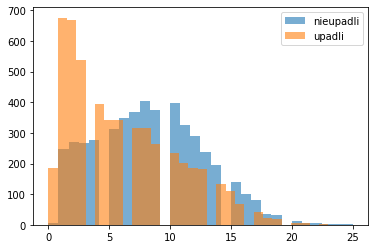

In [91]:
from matplotlib import pyplot
#bins = np.linspace(-10, 10, 100)
pyplot.hist(df_nieupadli['YEAR_FOUNDED_2'],bins=30, alpha=0.6, label='nieupadli')
pyplot.hist(df_upadli['YEAR_FOUNDED_2'],bins=30, alpha=0.6, label='upadli')
pyplot.legend(loc='upper right')
pyplot.show()

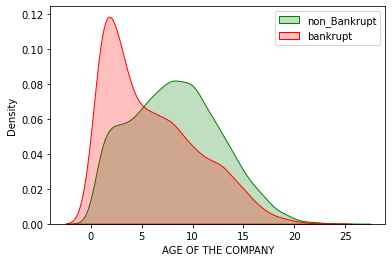

In [92]:
sns.kdeplot(df_clean.YEAR_FOUNDED_2[df_clean.FLAG==0], label='nieupadli', shade=True, color = 'green')
sns.kdeplot(df_clean.YEAR_FOUNDED_2[df_clean.FLAG==1], label='upadli',  shade=True, color = 'red')
plt.legend(labels=['non_Bankrupt', 'bankrupt'])
plt.xlabel('AGE OF THE COMPANY');

In [93]:
df_upadli.describe()

,EMPLOYEES,MARKETING_SPENDING,FLAG,YEAR_FOUNDED_2
count,5261.00000,5261.000000,5261.0,5261.000000
mean,14.97453,16851.800418,1.0,6.016727
std,15.11422,14058.789007,0.0,4.536010
min,1.00000,830.000000,1.0,0.000000
25%,4.00000,7794.000000,1.0,2.000000
50%,6.00000,9887.000000,1.0,5.000000
75%,23.00000,29913.000000,1.0,9.000000
max,63.00000,68180.000000,1.0,23.000000


In [94]:
df_nieupadli.describe()

,EMPLOYEES,MARKETING_SPENDING,FLAG,YEAR_FOUNDED_2
count,4739.000000,4739.000000,4739.0,4739.000000
mean,10.715763,9811.358936,0.0,8.287402
std,14.767425,7765.668943,0.0,4.399158
min,1.000000,2910.000000,0.0,0.000000
25%,3.000000,5039.000000,0.0,5.000000
50%,4.000000,7956.000000,0.0,8.000000
75%,6.000000,8142.000000,0.0,11.000000
max,61.000000,56080.000000,0.0,25.000000


In [95]:
cohens_d = (mean(df_upadli['YEAR_FOUNDED_2']) - mean(df_nieupadli['YEAR_FOUNDED_2'])) / (sqrt((stdev(df_upadli['YEAR_FOUNDED_2']) ** 2 + stdev(df_nieupadli['YEAR_FOUNDED_2']) ** 2) / 2))

print(cohens_d)

-0.5081962440598659


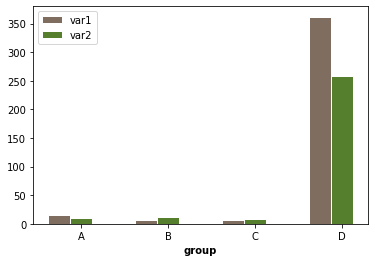

In [103]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [15, 6, 6, 362]
bars2 = [10.7, 12, 8.3, 258]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
